In [10]:
import numpy as np
import matplotlib.pyplot as plt

#  Objective Function
def objective_function(x):
    return np.sin(5 * x) * (1 - np.tanh(x**2))

#  Hill Climbing Algorithm
def hill_climb(f, x_start, max_iters=1000, step_size=0.01):
    x = x_start
    history = [x]
    for i in range(max_iters):
        left = x - step_size
        right = x + step_size

        if f(left) > f(x):
            x = left
        elif f(right) > f(x):
            x = right
        else:
            break
        history.append(x)
    return x, f(x), history


Starting point is: -1.3833486304813105


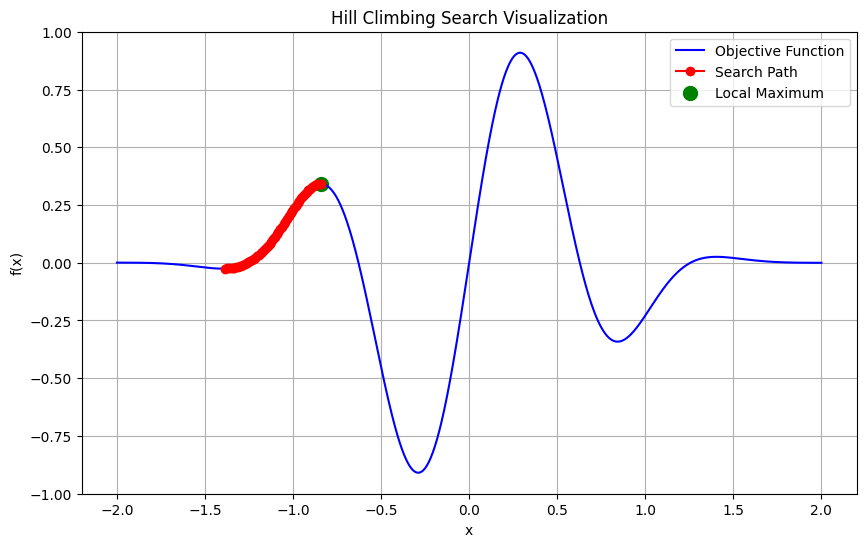

In [11]:
#  Start the Process
np.random.seed(12)
start = np.random.uniform(-2, 2)
print("Starting point is:", start)

peak_x, peak_y, path = hill_climb(objective_function, start)

# Plotting the Search
x_vals = np.linspace(-2, 2, 1000)
y_vals = objective_function(x_vals)
y_path = [objective_function(x) for x in path]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Objective Function", color='blue')
plt.plot(path, y_path, 'ro-', label='Search Path')
plt.scatter(peak_x, peak_y, color='green', s=100, label='Local Maximum')
plt.title("Hill Climbing Search Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# Task 1 


 Step Size: 0.01
 Starting point: -1.3833486304813105
 Local Maximum at x = -0.84334863048131
 f(x) = 0.3417909122425925


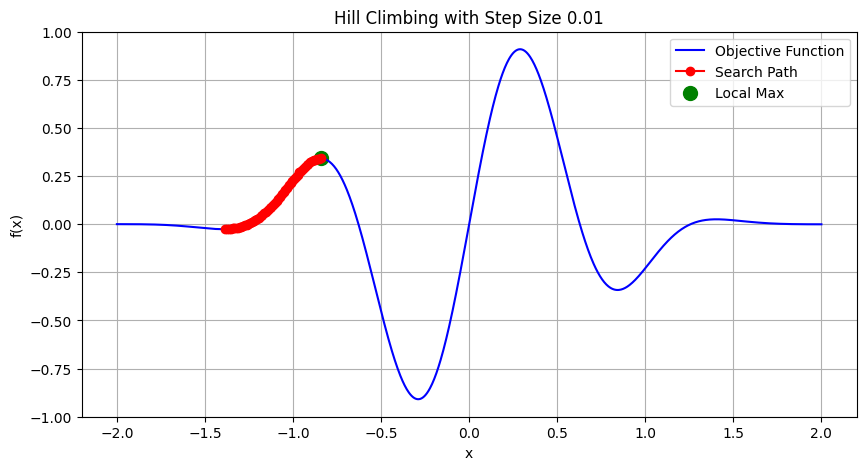


 Step Size: 0.1
 Starting point: -1.3833486304813105
 Local Maximum at x = -1.983348630481311
 f(x) = 0.00036173613847851813


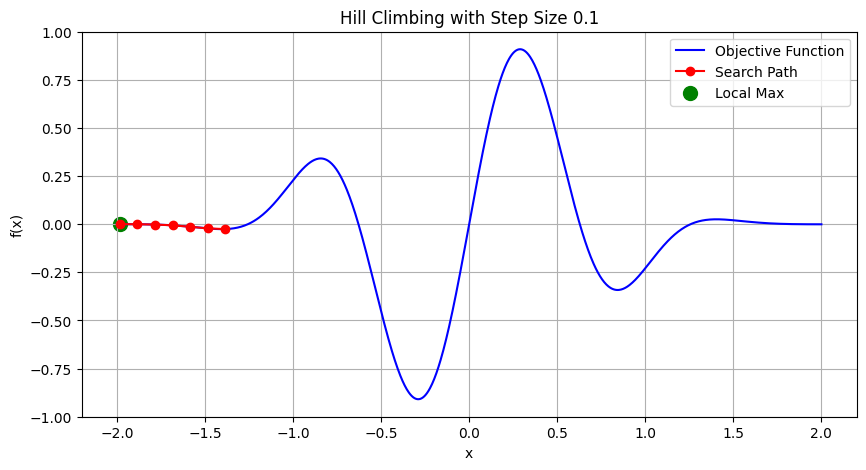


 Step Size: 0.5
 Starting point: -1.3833486304813105
 Local Maximum at x = -2.3833486304813105
 f(x) = 1.4086765032849084e-05


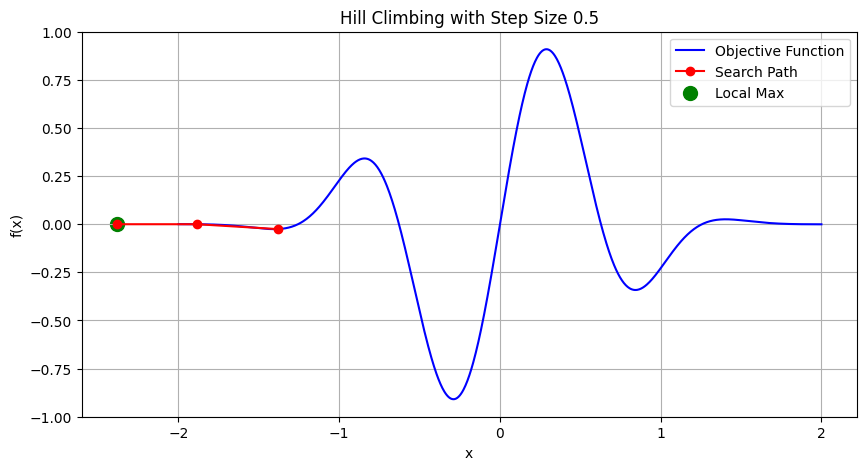

In [29]:
step_sizes = [0.01, 0.1, 0.5]

for step in step_sizes:
    np.random.seed(12)
    start = np.random.uniform(-2, 2)
    print(f"\n Step Size: {step}")
    print(" Starting point:", start)
    
    peak_x, peak_y, path = hill_climb(objective_function, start, step_size=step)

    print(" Local Maximum at x =", peak_x)
    print(" f(x) =", peak_y)

    #  Plotting
    x_vals = np.linspace(-2, 2, 1000)
    y_vals = objective_function(x_vals)
    y_path = [objective_function(x) for x in path]

    plt.figure(figsize=(10, 5))
    plt.plot(x_vals, y_vals, label="Objective Function", color='blue')
    plt.plot(path, y_path, 'ro-', label='Search Path')
    plt.scatter(peak_x, peak_y, color='green', s=100, label='Local Max')
    plt.title(f"Hill Climbing with Step Size {step}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Task 2

Run 1: Start = -0.5018, Peak x = -0.8418, f(x) = 0.3418
Run 2: Start = 1.8029, Peak x = 1.4029, f(x) = 0.0256
Run 3: Start = 0.9280, Peak x = 1.4080, f(x) = 0.0256
Run 4: Start = 0.3946, Peak x = 0.2846, f(x) = 0.9092
Run 5: Start = -1.3759, Peak x = -0.8459, f(x) = 0.3417
Run 6: Start = -1.3760, Peak x = -0.8460, f(x) = 0.3417
Run 7: Start = -1.7677, Peak x = -1.9977, f(x) = 0.0004
Run 8: Start = 1.4647, Peak x = 1.4047, f(x) = 0.0256
Run 9: Start = 0.4045, Peak x = 0.2845, f(x) = 0.9091
Run 10: Start = 0.8323, Peak x = 0.2923, f(x) = 0.9093

 Best Result Across 10 Runs 
Best Peak x: 0.2922903111841815
Best f(x): 0.9093104284522782


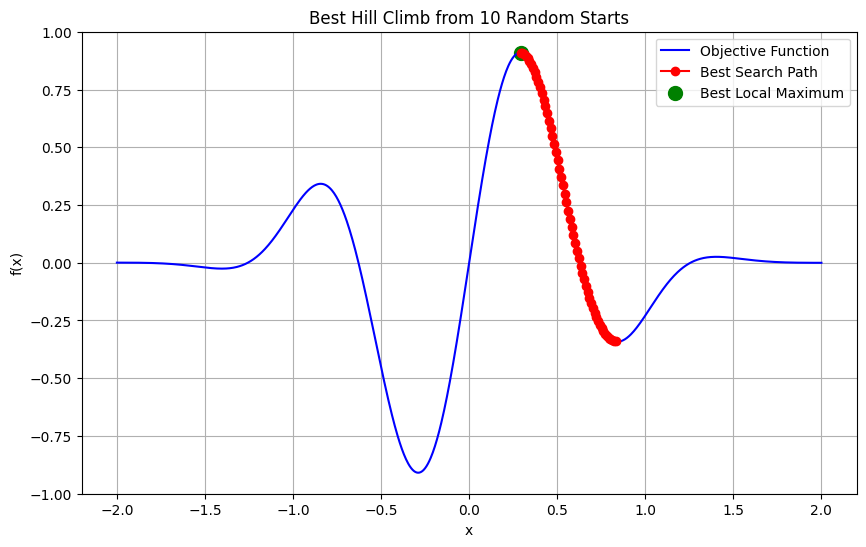

In [28]:
#  Run from 10 different random starting points
np.random.seed(42)
best_x = None
best_y = -np.inf
best_path = []

for i in range(10):
    start = np.random.uniform(-2, 2)
    peak_x, peak_y, path = hill_climb(objective_function, start, step_size=0.01)
    
    print(f"Run {i+1}: Start = {start:.4f}, Peak x = {peak_x:.4f}, f(x) = {peak_y:.4f}")
    
    if peak_y > best_y:
        best_y = peak_y
        best_x = peak_x
        best_path = path

# Print the best result
print("\n Best Result Across 10 Runs ")
print("Best Peak x:", best_x)
print("Best f(x):", best_y)

#  Plot the best path
x_vals = np.linspace(-2, 2, 1000)
y_vals = objective_function(x_vals)
y_path = [objective_function(x) for x in best_path]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Objective Function", color='blue')
plt.plot(best_path, y_path, 'ro-', label='Best Search Path')
plt.scatter(best_x, best_y, color='green', s=100, label='Best Local Maximum')
plt.title("Best Hill Climb from 10 Random Starts")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# TAsk 3

In [16]:
#  Modified Hill Climb for Minimization
def hill_climb_minimize(f, x_start, max_iters=1000, step_size=0.01):
    x = x_start
    history = [x]
    for i in range(max_iters):
        left = x - step_size
        right = x + step_size

        if f(left) < f(x):
            x = left
        elif f(right) < f(x):
            x = right
        else:
            break
        history.append(x)
    return x, f(x), history


 Starting point is: -1.6947668425041713
 Local Minimum at x = -1.404766842504171
 f(x) = -0.02557566846974539


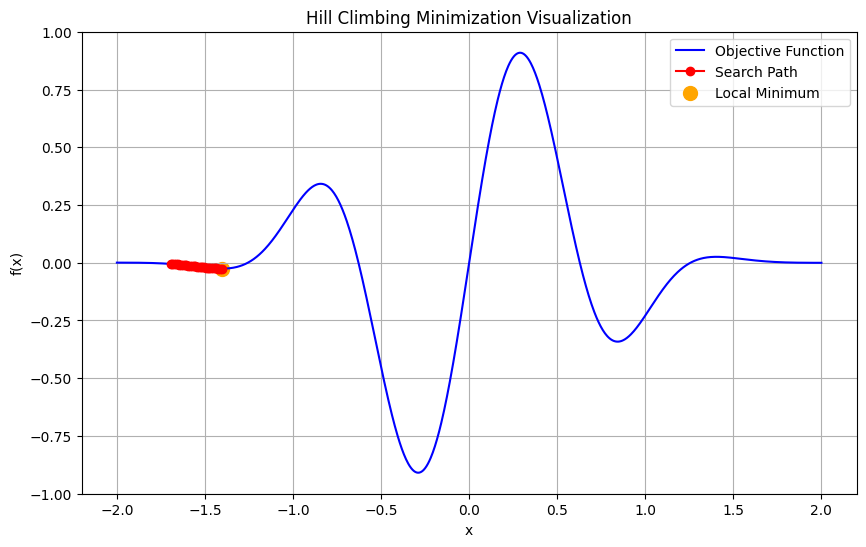

In [17]:
np.random.seed(7)
start = np.random.uniform(-2, 2)
print(" Starting point is:", start)

min_x, min_y, path = hill_climb_minimize(objective_function, start)

print(" Local Minimum at x =", min_x)
print(" f(x) =", min_y)

#  Plotting
x_vals = np.linspace(-2, 2, 1000)
y_vals = objective_function(x_vals)
y_path = [objective_function(x) for x in path]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="Objective Function", color='blue')
plt.plot(path, y_path, 'ro-', label='Search Path')
plt.scatter(min_x, min_y, color='orange', s=100, label='Local Minimum')
plt.title("Hill Climbing Minimization Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Task 4

In [18]:
#  2D Objective Function
def objective_function_2d(x, y):
    return np.sin(5 * x) * np.cos(5 * y) * (1 - np.tanh(x**2 + y**2))

In [30]:
#  Hill Climbing for 2D Function
def hill_climb_2d(f, start, max_iters=1000, step_size=0.01):
    x, y = start
    history = [(x, y)]
    for _ in range(max_iters):
        # Try moving in 8 directions
        neighbors = [
            (x + step_size, y),
            (x - step_size, y),
            (x, y + step_size),
            (x, y - step_size),
            (x + step_size, y + step_size),
            (x - step_size, y - step_size),
            (x + step_size, y - step_size),
            (x - step_size, y + step_size),
        ]
        
        # Pick the best neighbor
        current_val = f(x, y)
        best_val = current_val
        for xn, yn in neighbors:
            if f(xn, yn) > best_val:
                x, y = xn, yn
                best_val = f(xn, yn)
                break
        else:
            break  # No improvement found
        history.append((x, y))
    return (x, y), f(x, y), history

 Start: [-0.50183952  1.80285723]
 Local Maximum at: (np.float64(-0.27183952461054983), np.float64(1.7028572256396646))
 f(x, y) = 0.0031258001359780853


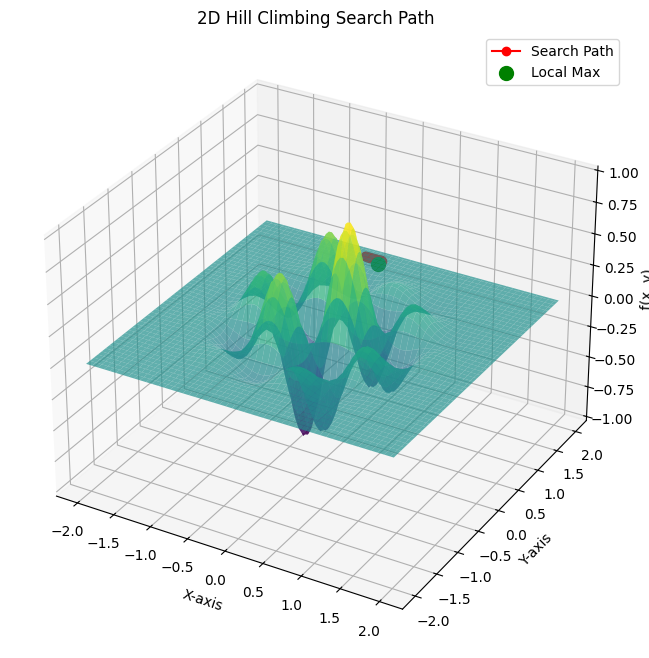

In [21]:
from mpl_toolkits.mplot3d import Axes3D

#  Run
np.random.seed(42)
start_point = np.random.uniform(-2, 2, size=2)
(peak_x, peak_y), peak_z, path = hill_climb_2d(objective_function_2d, start_point)

print(" Start:", start_point)
print(" Local Maximum at:", (peak_x, peak_y))
print(" f(x, y) =", peak_z)

#  Plotting the Surface and Search Path
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid
X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = objective_function_2d(X, Y)

# Surface plot
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Search path
path_x = [p[0] for p in path]
path_y = [p[1] for p in path]
path_z = [objective_function_2d(x, y) for x, y in path]

ax.plot(path_x, path_y, path_z, color='red', marker='o', label='Search Path')
ax.scatter(peak_x, peak_y, peak_z, color='green', s=100, label='Local Max')

ax.set_title("2D Hill Climbing Search Path ")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("f(x, y)")
ax.legend()
plt.show()
